CROP RECOMMENDATION

without normalization : load data, handle null values, get insights

In [9]:
import os
os.chdir('e://dewp')

In [11]:
import numpy as np
import pandas as pd
data=pd.read_csv('Crop_Recommendation.csv')
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


Relationship between Nutrients and Crop Yield 

Scatter plots: Visualize the relationship between Nitrogen, Phosphorus, and Potassium with Crops

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

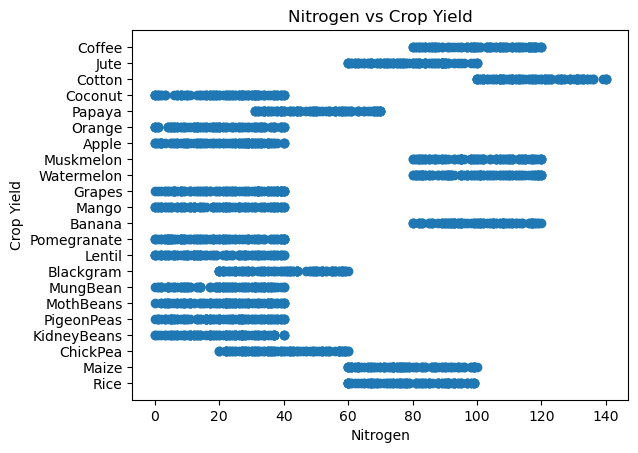

In [39]:
plt.scatter(data['Nitrogen'], data['Crop'])
plt.xlabel('Nitrogen')
plt.ylabel('Crop Yield')
plt.title('Nitrogen vs Crop Yield')
plt.show()

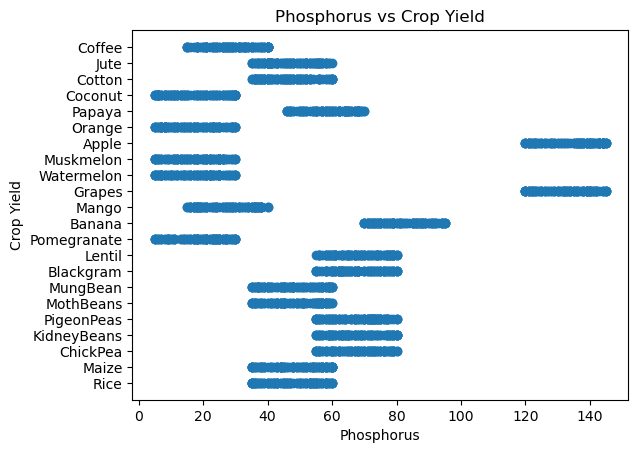

In [41]:
plt.scatter(data['Phosphorus'], data['Crop'])
plt.xlabel('Phosphorus')
plt.ylabel('Crop Yield')
plt.title('Phosphorus vs Crop Yield')
plt.show()

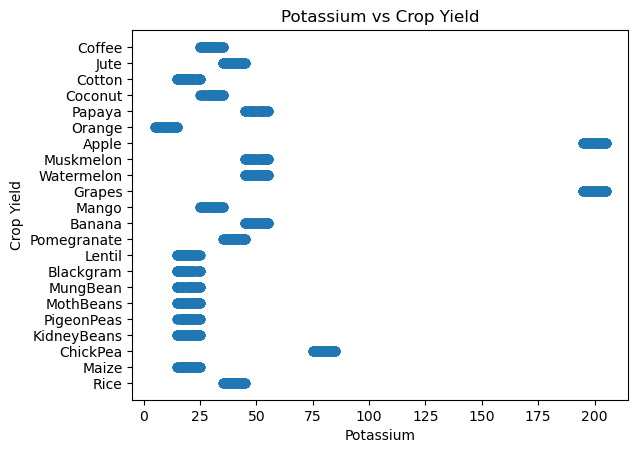

In [43]:
plt.scatter(data['Potassium'], data['Crop'])
plt.xlabel('Potassium')
plt.ylabel('Crop Yield')
plt.title('Potassium vs Crop Yield')
plt.show()

Impact of Climatic Conditions

Histograms: Analyze the distribution of Temperature, Humidity, Rainfall, and pH_Value.

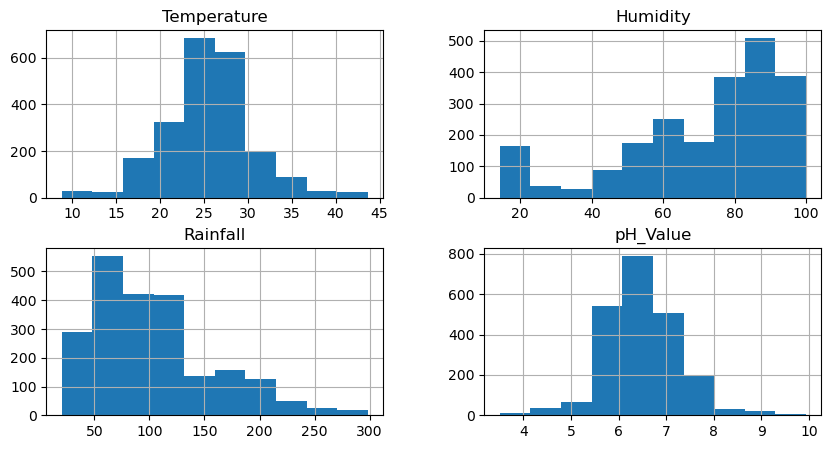

In [49]:
data[['Temperature', 'Humidity', 'Rainfall', 'pH_Value']].hist(bins=10, figsize=(10, 5))
plt.show()

In [13]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
X=data.drop(['Crop'],axis=1)
y=data['Crop']

In [15]:
print(X.shape)
print(y.shape)

(2200, 7)
(2200,)


In [16]:
X.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [17]:
y.head()

0    Rice
1    Rice
2    Rice
3    Rice
4    Rice
Name: Crop, dtype: object

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=5)

In [19]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
knn.predict([[80,42,40,21,83,6.7,211]])

C:\conda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Rice'], dtype=object)

In [20]:
y_pred=knn.predict(X_test)
original=metrics.accuracy_score(y_test, y_pred)*100
print(original)

96.36363636363636


In [29]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
knn.predict([[70,55,43,26,80,6,200]])

C:\conda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Jute'], dtype=object)

with normalization

In [30]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(X))        # Scaling the data
scaled_data.columns=['N','P','K','Temp','Humid','pH','Rain']
scaled_data

,N,P,K,Temp,Humid,pH,Rain
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [32]:
X_train,X_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.4,random_state=5)

In [34]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
original=metrics.accuracy_score(y_test, y_pred)*100
print(original)

94.77272727272728


get normalized data and transform to PCA

In [36]:
pca=PCA(n_components=7)
pca.fit(scaled_data)
data_pca=pca.transform(scaled_data)
data_pca=pd.DataFrame(data_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.582869,-0.844586,1.373343,-1.614129,0.308224,-0.095997,-0.025239
1,-0.474635,-0.784895,1.252178,-1.792762,1.107745,-0.532255,-0.280543
2,-0.634068,-0.694522,1.179332,-1.818106,2.523263,-0.538551,-0.105967
3,-1.047920,-1.087658,1.393351,-0.982401,1.448781,-0.656929,0.275272
4,-0.873258,-0.658673,1.455685,-2.335012,1.959633,-0.318025,0.052740


In [52]:
X_train2,X_test2,y_train2,y_test2=train_test_split(data_pca,y,test_size=0.4,random_state=100)

In [54]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
original=metrics.accuracy_score(y_test, y_pred)*100
print(original)

94.77272727272728


SVC

In [57]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
svc=SVC(random_state=101)
svc.fit(X_train,y_train)
print("Test Score:",svc.score(X_test,y_test))

Test Score: 0.9795454545454545
